In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adityadesai13/used-car-dataset-ford-and-mercedes")

print("Path to dataset files:", path)

c:\Users\canoz\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\canoz\.cache\kagglehub\datasets\adityadesai13\used-car-dataset-ford-and-mercedes\versions\3


In [2]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

In [3]:
dataFrame=pd.read_csv("dataset/merc.csv")

In [4]:
dataFrame.head() # ilk 5 veriye göz atalım 

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


VERİYİ ANLAMAK

In [5]:
dataFrame.describe()  #datasetin özet özelliklerine bakma 

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


##### std özelliği standart sapma özelliği fazla bir veri yani veri aralığı geniş çok pahalı da var ucuz da var 

### toplam kaç tane satırda hangi değerlerde null değerler var bunları sayısını bulmak için

In [6]:
dataFrame.isnull().sum()  

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

GRAFİKSEL ANALİZLER

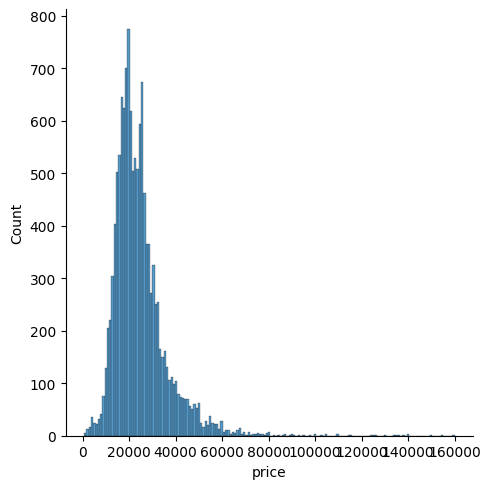

In [7]:
sbn.displot(dataFrame["price"])

veri seti 150000 fiyatına doğru az bir araba var bu veriyi yanlış yönlendirebilir 
her iki yönü de değerlendirmek gerekir hem çıkartarak hemde çıkarmayarak ne kadar iyi olduğuna bakılmalı 

In [ ]:
sbn.countplot(dataFrame["year"]) # satışların yıllara göre dağılımlarını göreceğiz 

### corr komutu ile korelasyon 

In [9]:
dataFrame.corr(numeric_only=True) #veriler arasındaki koralasyon ilgiyi gösterir

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [10]:
 # stirng değerleri corr yapamıyor bizde numeric_only =True yaptık 
#örnek araba otomatikmi maunel mi string verisi hata verdiriyordu 

In [11]:
dataFrame.corr(numeric_only=True)["price"].sort_values() ## diğer değerlerin fiyat ile aralarındaki ilişkiyi küyüğe sıralar 

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

### burada yıl değeri ve enginesize  tax(vergi) pozitif değerleri etkiliyor  milage(km si) ve mpg(mile per galon yakıt tüketimi) negatif ilişkiliymiş 
#### veriyi dayha iyi anlıyoruz  

EN yüksek fiyatlı arabalar 

<Axes: xlabel='mileage', ylabel='price'>

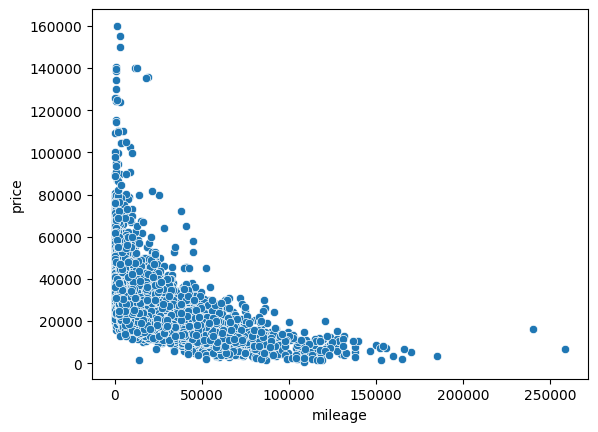

In [12]:
sbn.scatterplot(x="mileage",y="price",data=dataFrame)  #mil ile fiyat arasındaki ilişki 

#### ascending=False /true  ----- artan sıralama dır 

In [13]:
dataFrame.sort_values("price",ascending=False).head(20)  #en yüksek fiyatlı 20 arabayı getirir



,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6199,G Class,2020,159999,Semi-Auto,1350,Petrol,145,21.4,4.0
10044,G Class,2020,154998,Automatic,3000,Petrol,150,21.4,4.0
5,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2
8737,A Class,2019,140319,Semi-Auto,785,Petrol,150,22.1,4.0
6386,G Class,2018,139995,Semi-Auto,13046,Petrol,145,21.4,4.0
8,G Class,2019,139948,Automatic,12000,Petrol,145,21.4,4.0
9133,A Class,2019,139559,Semi-Auto,1000,Petrol,145,22.1,4.0
8821,A Class,2020,138439,Semi-Auto,1000,Petrol,145,22.1,4.0
5902,G Class,2018,135771,Semi-Auto,19000,Petrol,145,21.4,4.0
7864,G Class,2018,135124,Semi-Auto,18234,Petrol,150,21.4,4.0


In [14]:
dataFrame.sort_values("price",ascending=True).head(10)  #en düşük fiyatlı 10 arabayı getirir


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
11816,A Class,2003,650,Manual,109090,Petrol,235,40.0,1.4
12008,A Class,2010,1350,Manual,116126,Diesel,145,54.3,2.0
11765,SLK,2000,1490,Automatic,87000,Petrol,265,27.2,3.2
11549,C Class,2002,1495,Automatic,13800,Diesel,305,39.8,2.7
12594,C Class,2004,1495,Manual,119000,Petrol,300,34.5,1.8
11174,S Class,2001,1695,Automatic,108800,Diesel,325,31.7,3.2
12710,C Class,2006,1695,Automatic,153000,Petrol,300,33.6,1.8
12766,C Class,2004,1780,Automatic,118000,Diesel,265,41.5,2.2
12009,A Class,2007,1800,Automatic,84000,Petrol,200,42.8,1.5
11764,SLK,1998,1990,Automatic,99300,Petrol,265,32.1,2.3


### ---eğer bir verinin %99 unu alırsak sonucu büyük ihtimalle değiştirmeden işlem yapabiliriz veri silmek için 

In [15]:
len(dataFrame)

13119

In [16]:
len(dataFrame)*0.01 ## 13119 *0.01 yani 131 tane kadar veri silinebilir 

131.19

In [17]:
##en yüksek fiyatlı 131 tane arabayı silelim datadan 
yuzdeDoksanDokuzDf = dataFrame.sort_values("price",ascending=False).iloc[131:]  #sıraladı ve 131. en pahalıdan sonrasını aldı veriye

In [18]:
yuzdeDoksanDokuzDf.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


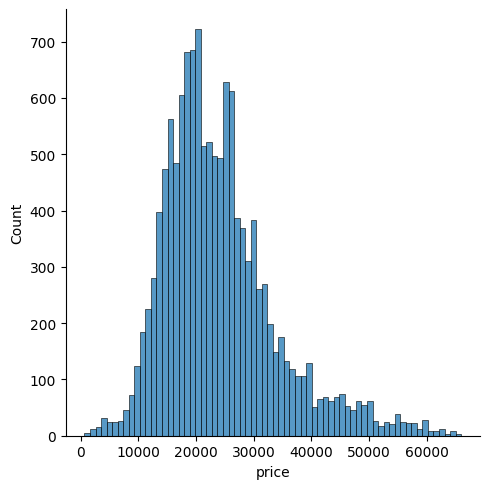

In [19]:
plt.Figure(figsize=(7,5))
sbn.displot(yuzdeDoksanDokuzDf["price"]) 

In [20]:
dataFrame.groupby("year").mean(["price"])[ "price"] # yıla göre grupla ve fiyat ortlamalarını getir 

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [21]:
yuzdeDoksanDokuzDf.groupby("year").mean(["price"])[ "price"] # yıla göre grupla ve fiyat ortlamalarını getir 

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [22]:
## hem ham veride "dataFrame" hemde "yuzdeDoksanDokuzDf" de  1970 verisinde 24999 fiyat veriyi bozuyor mantığı değiştiriyor 
##genel eğilim yıl arttıkça fiyat arması ike n1970 verisi nerdeyse 2018 il aynı fiyatta 

In [23]:
dataFrame[dataFrame.year != 1970].groupby("year").mean("price")["price"] #1970 verisini dışarda bıraktık 
#istersek bu veriyi dışarı atmayabiliriz.


year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [24]:
dataFrame=yuzdeDoksanDokuzDf

In [25]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [26]:
dataFrame=dataFrame[dataFrame.year != 1970]  # 1970 i atalım

In [27]:
dataFrame.groupby("year").mean("price")["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [28]:
dataFrame.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6177,GLS Class,2019,65990,Semi-Auto,5076,Diesel,150,30.4,3.0
5779,C Class,2020,65990,Semi-Auto,999,Petrol,145,28.0,4.0
3191,C Class,2020,65980,Semi-Auto,3999,Petrol,145,28.0,4.0
4727,C Class,2019,65000,Semi-Auto,3398,Petrol,145,27.2,4.0
8814,S Class,2019,64999,Semi-Auto,119,Petrol,145,40.9,3.0


In [29]:
# string olan fuelType transmission değerlerini çıkaralım

In [30]:
dataFrame=dataFrame.drop("fuelType", axis=1)


In [31]:
dataFrame=dataFrame.drop("transmission", axis=1)
dataFrame=dataFrame.drop("model", axis=1)

#### MODELİ OLUŞTURMAK

In [32]:
y = dataFrame["price"].values #sonuçta bulunmasını istediğimiz veri
x = dataFrame.drop("price",axis=1).values #model eğitilecek veri 

In [33]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=10)

veriler doğru bölünmüş mü

In [50]:
len(x_train)

9090

In [51]:
len(x_test)

3897

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
scaler=MinMaxScaler()


In [54]:
x_train = scaler.fit_transform(x_train) #aynı anda fit ve transform yapma 

In [55]:
x_test=scaler.fit_transform(x_test)

### tensorflow  çağırma 

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense #katmanlar için 

#### layer sayısını genelde x_train deki stun kadardan başlatırız ve daha fazla da olabilir 

In [57]:
x_train.shape 

(9090, 5)

In [58]:
model=Sequential()

In [59]:
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1))

In [60]:
model.compile(optimizer="adam",loss="mse")

#### modeli eğitme

In [61]:
model.fit(x=x_train, y=y_train , epochs=300 ,validation_data=(x_test,y_test),batch_size=250)
 #doğrulama işlemelrini de yapacak validation_data 
 #batch_size büyük verilerde verileri bölerek eğitime verir 
 # epochs sistem için çok önemli 

Epoch 1/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 672146368.0000 - val_loss: 688105792.0000
Epoch 2/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 672128896.0000 - val_loss: 688076032.0000
Epoch 3/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 672072704.0000 - val_loss: 687974784.0000
Epoch 4/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 671889664.0000 - val_loss: 687661312.0000
Epoch 5/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 671365056.0000 - val_loss: 686798976.0000
Epoch 6/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 669982144.0000 - val_loss: 684631936.0000
Epoch 7/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 666770560.0000 - val_loss: 679866048.0000
Epoch 8/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 660109120.0000 - val_loss: 670451968.0000
Epoch 9/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 647467136.0000 - val_loss: 653157056.0000
Epoch 10/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 625312832.0000 - val_loss: 624